In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
# read the dataset
df = pd.read_csv("Airbnb.csv")

In [3]:
# check for NaN
df.isna().sum()

Unnamed: 0                         0
id                                 0
name                               0
host_id                            0
host_since                         0
host_response_time                 0
host_response_rate                 0
host_acceptance_rate               0
host_is_superhost                  0
host_total_listings_count          0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_group                0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
bathrooms                         20
bedrooms                           0
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
n

In [4]:
# drop NaN rows
df.dropna(inplace=True)

In [5]:
# delete "Unnamed: 0" column
df.drop('Unnamed: 0',axis=1,inplace=True)

# EDA

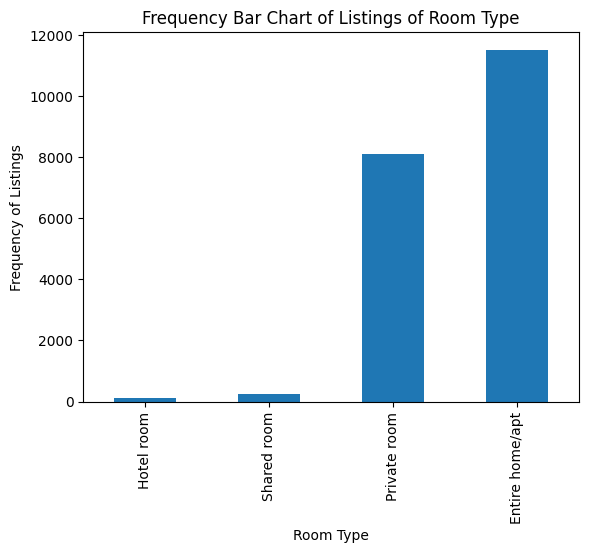

In [6]:
df["room_type"].value_counts(ascending=True).plot.bar()
plt.title('Frequency Bar Chart of Listings of Room Type')
plt.ylabel('Frequency of Listings')
plt.xlabel('Room Type')
plt.show()

In [7]:
df[['room_type','review_scores_average']].groupby(['room_type']).mean()

review_scores_average
room_type                             
Entire home/apt               3.834466
Hotel room                    3.749470
Private room                  3.761491
Shared room                   3.674485

In [8]:
x = df[['room_type','review_scores_average']].groupby(['room_type']).mean()

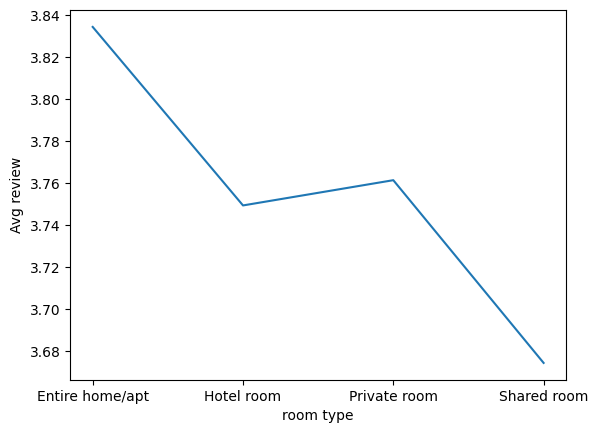

In [9]:
plt.plot(x)
plt.xlabel('room type')
plt.ylabel('Avg review')
plt.show()

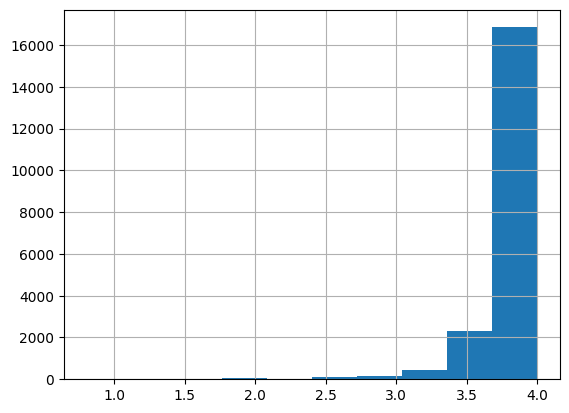

In [10]:
df['review_scores_average'].hist(bins=10)
plt.show()

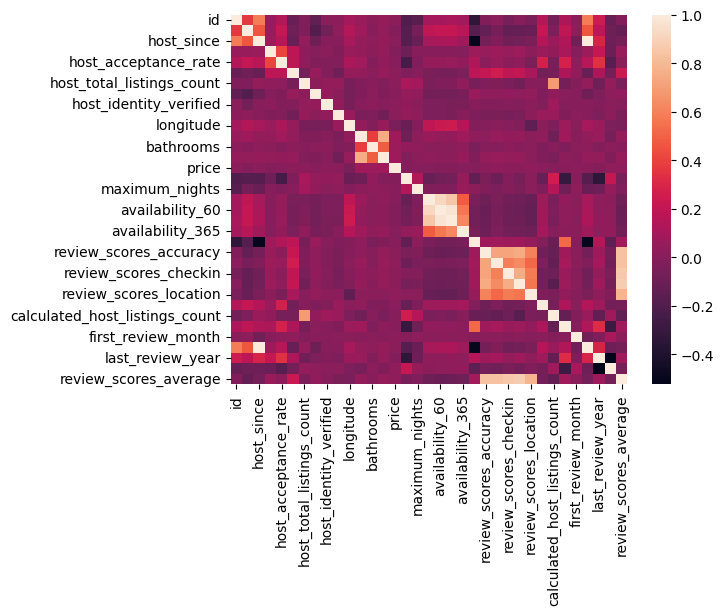

In [11]:
# compute correlation
cor = df.corr(numeric_only=True)
# plot heatmap to see relationship between variables
sns.heatmap(cor)
plt.show()

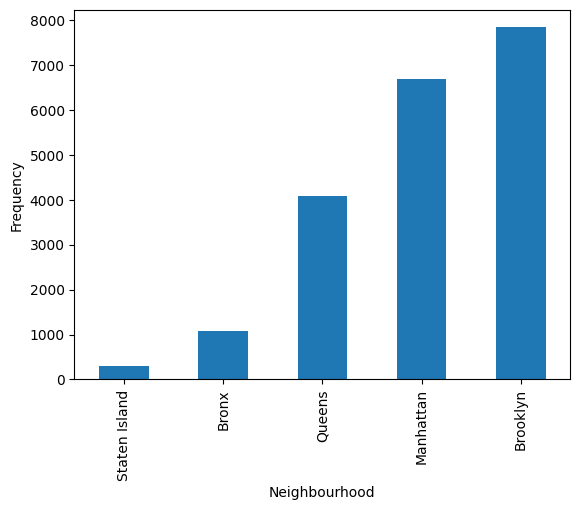

In [12]:
df["neighbourhood_group"].value_counts(ascending=True).plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Neighbourhood')
plt.show()

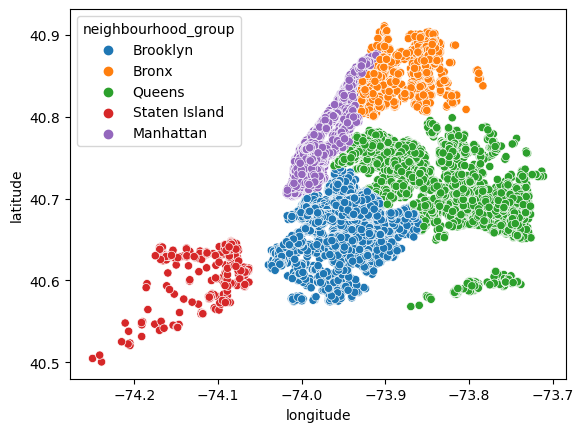

In [13]:
# Map of Neighbourhood
sns.scatterplot(data=df, x="longitude", y="latitude", hue="neighbourhood_group")
plt.show()

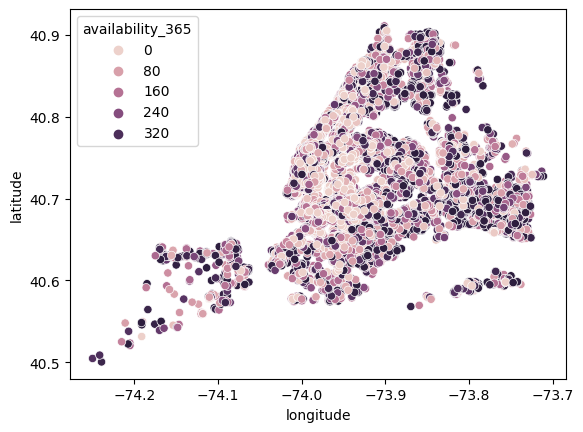

In [14]:
# Availability of Room
sns.scatterplot(data=df, x="longitude", y="latitude", hue="availability_365")
plt.show()

In [15]:
import plotly.express as px

# distributed of properties across the city i.e neighbourhood_group
fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="neighbourhood_group", 
                        hover_data=["neighbourhood_group"],
                        color="neighbourhood_group")

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [16]:
# check for 'object' type column which is of no use, to make the model simple
df.select_dtypes('object').nunique() 

name                   19594
host_response_time         4
neighbourhood_group        5
room_type                  4
amenities              18868
first_review            3352
last_review             1279
dtype: int64

In [17]:
col = ['host_id','id','latitude','longitude','name','amenities','first_review','last_review','host_since','first_review_year','last_review_year']

In [18]:
df.drop(col,axis=1,inplace=True)

In [19]:
# perform one-hot encoding for categorical columns
df = pd.get_dummies(df)

In [20]:
# get X and y
X = df.drop('price',axis=1)
y = df['price']

In [21]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Linear Regression

In [22]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [23]:
# compute mean square error and root mean square error to check model performance
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('mse:',mse)
print('rmse:',rmse)

mse: 20575.667689994993
rmse: 143.44221027994163


# Random Forest 

In [24]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 42)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [25]:
# compute mean square error and root mean square error to check model performance
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('mse:',mse)
print('rmse:',rmse)

mse: 282834.13251079456
rmse: 531.8215231737003


# XGBoost

In [26]:
# Fitting XGBoost to the Training set
from xgboost import XGBRegressor
reg = XGBRegressor()
reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = reg.predict(X_test)

In [27]:
# compute mean square error and root mean square error to check model performance

mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('mse:',mse)
print('rmse:',rmse)

mse: 248996.09753240782
rmse: 498.9950876836443


# Decision Tree Regression i.e CART

In [28]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 42)
reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = reg.predict(X_test)

In [29]:
# compute mean square error and root mean square error to check model performance

mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('mse:',mse)
print('rmse:',rmse)

mse: 43922.39830084958
rmse: 209.57671221023003


# forest_importances

- Identifying features that influence the price of a property

- the featues with long bar is more important for prediction.

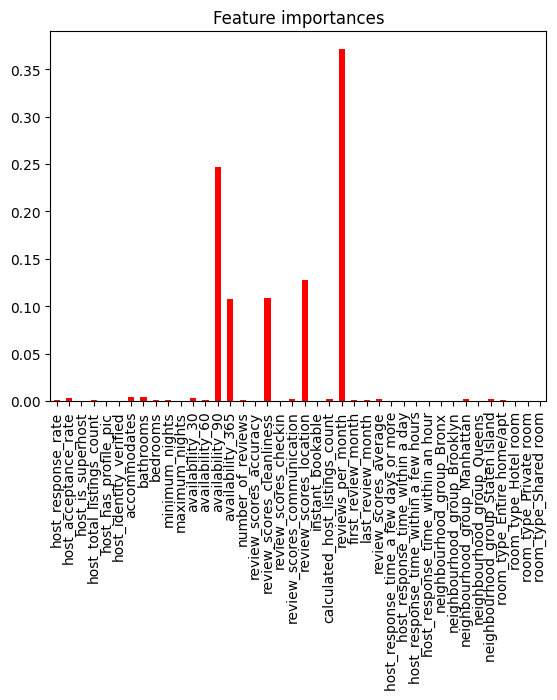

In [30]:
forest_importances = pd.Series(reg.feature_importances_, index=list(X))

forest_importances.plot.bar(color='red')
plt.title("Feature importances")
plt.show()